In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [48]:
df_raw = pd.read_csv("DIABETES.csv")


df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, \
                                                                test_size = 0.3, random_state = 1234)

svm_uncustomized = SVR()
svm_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set:\t%.3f" %(svm_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:\t%.3f" %(svm_uncustomized.score(df_test_x, df_test_y)))


Score on training set:	-0.006
Score on test set:	-0.036


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [49]:
svm_uncustomized

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled["GENDER"] = df_raw["GENDER"]
df_scaled.head()


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,0.800500,2,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,1,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,2,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,1,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,1,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [67]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
print ("Scaled Train data X size: {}".format(df_scaled_train_x.shape))
print ("Scaled data X size\t: {}".format(df_scaled_test_x.shape))

Scaled Train data X size: (309, 10)
Scaled data X size	: (133, 10)


In [68]:
svm_scaled = SVR()
svm_scaled.fit(df_scaled_train_x, df_train_y)

print("Score on training set:\t%.3f" %(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Score on test set:\t%.3f" %(svm_scaled.score(df_scaled_test_x, df_test_y)))

Score on training set:	0.163
Score on test set:	0.166


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [69]:
svm_scaled

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
train_score = []; test_score=[]

para_C = [10**c for c in range(-2, 3)]

for v_C in para_C:
    svm = SVR(C = v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["C"] = para_C
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainScore,TestScore
0,0.01,-0.025,-0.033
1,0.10,-0.003,-0.009
2,1.00,0.163,0.166
3,10.00,0.515,0.499
4,100.00,0.651,0.480


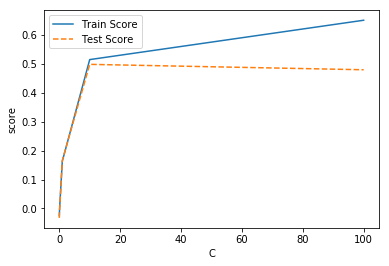

In [71]:
plt.plot(para_C, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_C, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("C")
plt.legend()

In [72]:
train_score = []; test_score=[]

para_gamma = [10**gamma for gamma in range(-2, 3)]

for v_gamma in para_gamma:
    svm = SVR(gamma = v_gamma, C = 10)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))

df_score_gamma = pd.DataFrame()
df_score_gamma["gamma"] = para_gamma
df_score_gamma["TrainScore"] = train_score
df_score_gamma["TestScore"] = test_score

df_score_n.round(3)

,C,TrainScore,TestScore
0,0.01,-0.025,-0.033
1,0.10,-0.003,-0.009
2,1.00,0.163,0.166
3,10.00,0.515,0.499
4,100.00,0.651,0.480


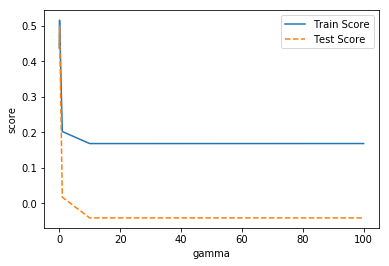

In [73]:
plt.plot(para_gamma, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_gamma, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("gamma")
plt.legend()

In [74]:
train_score = []; test_score=[]

para_epsilon = [eps / 20 for eps in range(1, 21)]

for v_epsilon in para_epsilon:
    svm = SVR(epsilon = v_epsilon, C = 10, gamma = 0.01)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))

df_score_epsilon = pd.DataFrame()
df_score_epsilon["epsilon"] = para_epsilon
df_score_epsilon["TrainScore"] = train_score
df_score_epsilon["TestScore"] = test_score

df_score_epsilon.round(3)

,epsilon,TrainScore,TestScore
0,0.05,0.437,0.440
1,0.10,0.437,0.440
2,0.15,0.437,0.440
3,0.20,0.437,0.440
4,0.25,0.437,0.440
5,0.30,0.437,0.440
6,0.35,0.437,0.440
7,0.40,0.436,0.440
8,0.45,0.436,0.440
9,0.50,0.436,0.440


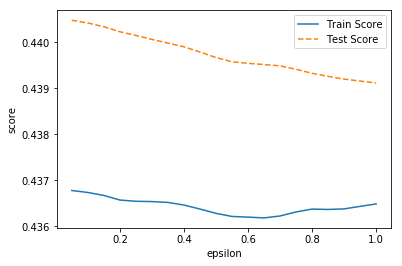

In [75]:
plt.plot(para_epsilon, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_epsilon, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("epsilon")
plt.legend()

In [76]:
svr_final = SVR(C = 10, gamma = 0.01, epsilon = 0.5)
svr_final.fit(df_scaled_train_x, df_train_y)

print("Score on trainig set\t: %.3f" % svr_final.score(df_scaled_train_x, df_train_y))
print("Score on test set\t: %.3f" % svr_final.score(df_scaled_test_x, df_test_y))

Score on trainig set	: 0.436
Score on test set	: 0.440


In [77]:
estimator = SVR()

param_grid = {"C":para_C, "gamma":para_gamma, "epsilon":para_epsilon}

grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("Best estimator model \n{}".format(grid_dt.best_estimator_))
print("\nBest parameter: \n{}".format(grid_dt.best_params_))

print("\nBest score: \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator model 
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=1.0, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Best parameter: 
{'C': 100, 'epsilon': 1.0, 'gamma': 0.01}

Best score: 
0.064


In [78]:
estimator = SVR()

param_grid = {"C":para_C, "gamma":para_gamma, "epsilon":para_epsilon}

grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_scaled_train_x, df_train_y)

print("Best estimator model \n{}".format(grid_dt.best_estimator_))
print("\nBest parameter: \n{}".format(grid_dt.best_params_))

print("\nBest score: \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator model 
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Best parameter: 
{'C': 100, 'epsilon': 0.05, 'gamma': 0.01}

Best score: 
0.481


In [79]:
svr_final = SVR(C = 100, gamma = 0.01, epsilon = 0.65)
svr_final.fit(df_scaled_train_x, df_train_y)

print("Score on trainig set\t: %.3f" % svr_final.score(df_scaled_train_x, df_train_y))
print("Score on test set\t: %.3f" % svr_final.score(df_scaled_test_x, df_test_y))

Score on trainig set	: 0.534
Score on test set	: 0.503
